# 1 Import Library

In [14]:
%reset -f

In [15]:
import os
import math
pwd = os.getcwd()
%env DATAPATH={pwd}/wrk/

env: DATAPATH=/home/test01/App/01_PySeis/xu/TASK6_DAS_DATA/Data/DAS/wrk/


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, interpolate
import sys
sys.path.append("../")
import plotting
from pyseis.wave_equations import elastic_isotropic
from pyseis.wave_equations import acoustic_isotropic
from pyseis.wavelets.elastic import Elastic2D
from pyseis.wavelets.acoustic import Acoustic2D
from pyseis import inversion
%matplotlib inline

# 2 Read Model

In [17]:
# import numpy as np
# import matplotlib.pyplot as plt

# dir_model = "./Data/"


# n_traces, n_samples = 883, 5000
# dtype = np.float32  # try np.int16 if float32 doesn’t work

# # Load
# data1 = np.fromfile(dir_model+"stack.run3.decon.geo_ch15_median.bin",dtype=dtype).reshape(n_traces, n_samples)
# data2 = np.fromfile(dir_model+"stack.run2.decon.geo_ch15_median.bin",dtype=dtype).reshape(n_traces, n_samples)


In [19]:
import numpy as np
import matplotlib.pyplot as plt

dir_model = "./Data/"

n_traces, n_samples = 883, 5000
use_samples = 2000
dtype = np.float32  # change if needed

# Load full then trim
data1 = np.fromfile(dir_model+"stack.run3.decon.geo_ch15_median.bin", dtype=dtype)\
            .reshape(n_traces, n_samples)[:, :use_samples]

data2 = np.fromfile(dir_model+"stack.run3.geo_ch15_median.bin", dtype=dtype)\
            .reshape(n_traces, n_samples)[:, :use_samples]

print("data1 shape:", data1.shape)
print("data2 shape:", data2.shape)


data1 shape: (883, 2000)
data2 shape: (883, 2000)


In [20]:
# Save the trimmed arrays back to binary
data1.tofile(dir_model + "stack.run3.decon.geo_ch15_median.trimmed.bin")
data2.tofile(dir_model + "stack.run3.geo_ch15_median.trimmed.bin")


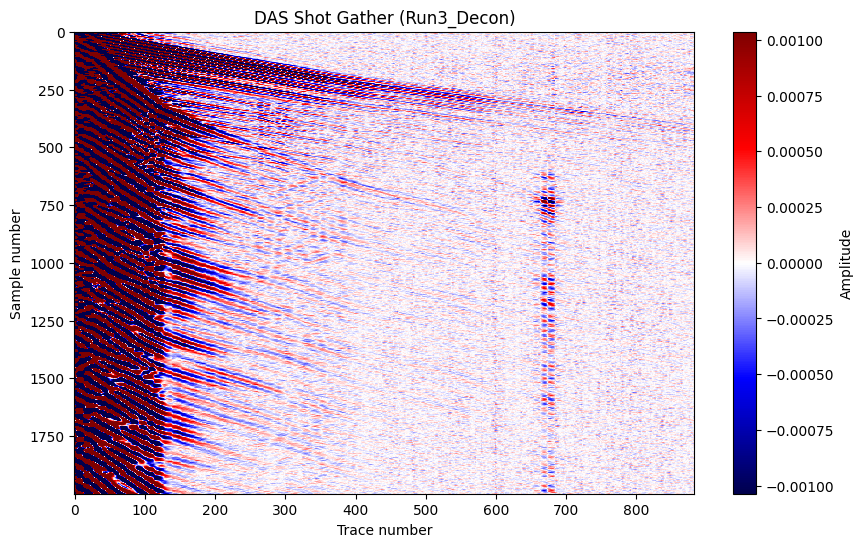

In [21]:

# Transpose for display
gather1 = data1.T   # (samples, traces)
# Normalize / clip for visibility
vmax = np.percentile(np.abs(gather1), 85)  # robust max for color scaling

plt.figure(figsize=(10,6))
plt.imshow(gather1, aspect="auto", cmap="seismic", origin="upper",
           vmin=-vmax, vmax=vmax)
plt.title("DAS Shot Gather (Run3_Decon)")
plt.xlabel("Trace number")
plt.ylabel("Sample number")
plt.colorbar(label="Amplitude")
plt.show()


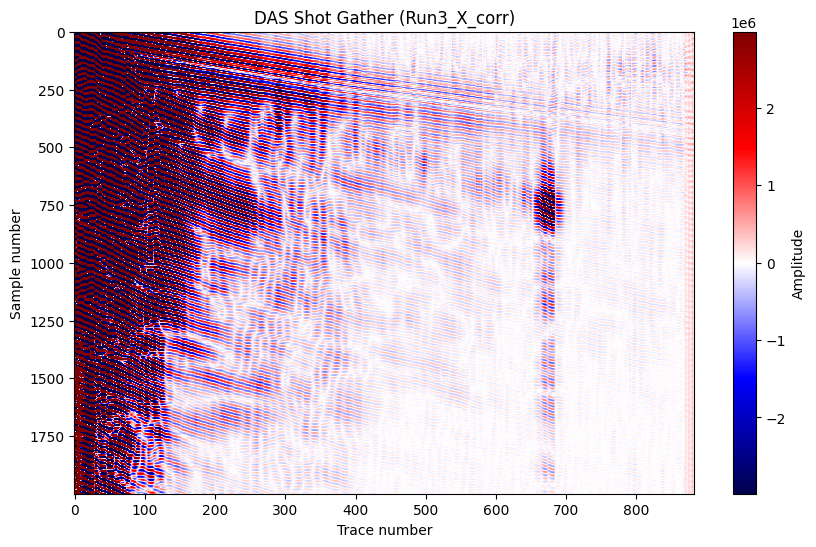

In [24]:

# Transpose for display
gather2 = data2.T   # (samples, traces)

# Normalize / clip for visibility
vmax = np.percentile(np.abs(gather2), 85)  # robust max for color scaling

plt.figure(figsize=(10,6))
plt.imshow(gather2, aspect="auto", cmap="seismic", origin="upper",
           vmin=-vmax, vmax=vmax)
plt.title("DAS Shot Gather (Run3_X_corr)")
plt.xlabel("Trace number")
plt.ylabel("Sample number")
plt.colorbar(label="Amplitude")
plt.show()